# Spaceship Titanic

### Predict which passengers are transported to an alternate dimension

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the *Spaceship Titanic's* collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Info of dataset
def dfInfo(frame):
    print("Data description:")
    print("Total number of records: %d" % frame.shape[0])
    print("Total number of columns/features/variables: %d" % frame.shape[1])
    print("\n")
    cols = frame.columns
    data_type = []
    for col in cols:
        data_type.append(frame[col].dtype)
    n_uni = frame.nunique()
    n_miss = frame.isna().sum()
    names = list(zip(cols, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name", "Type", "Unique levels", "Missing"])
    print(variable_desc)

In [4]:
dfInfo(train)

Data description:
Total number of records: 8693
Total number of columns/features/variables: 14


            Name     Type  Unique levels  Missing
0    PassengerId   object           8693        0
1     HomePlanet   object              3      201
2      CryoSleep   object              2      217
3          Cabin   object           6560      199
4    Destination   object              3      182
5            Age  float64             80      179
6            VIP   object              2      203
7    RoomService  float64           1273      181
8      FoodCourt  float64           1507      183
9   ShoppingMall  float64           1115      208
10           Spa  float64           1327      183
11        VRDeck  float64           1306      188
12          Name   object           8473      200
13   Transported     bool              2        0


In [5]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Lest's create a copy of the orignal dataset and let's work with this new dataset

In [6]:
ctrain = train.copy()

Let's make some data transformation in the **CryoSleep**, **VIP** and **Transported** columns

In [7]:
ctrain['CryoSleep'] = ctrain['CryoSleep'].map({True:1, False:0})
ctrain['VIP'] = ctrain['VIP'].map({True:1, False:0})
ctrain['Transported'] = ctrain['Transported'].map({True:1, False:0})
ctrain.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
5,0005_01,Earth,0.0,F/0/P,PSO J318.5-22,44.0,0.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1
6,0006_01,Earth,0.0,F/2/S,TRAPPIST-1e,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1
7,0006_02,Earth,1.0,G/0/S,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1
8,0007_01,Earth,0.0,F/3/S,TRAPPIST-1e,35.0,0.0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1
9,0008_01,Europa,1.0,B/1/P,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1


Let's divide the feature **Cabin** into thre features: **Deck**, **Num**, **Side**

In [8]:
cabin = ctrain['Cabin'].str.split("/",expand=True)

In [9]:
ctrain = pd.concat([ctrain,cabin], axis=1)
ctrain.rename(columns={0:'Deck', 1:'Num', 2:'Port'}, inplace=True)

In [10]:
# Remove the feature 'Cabin'
ctrain.drop(['Cabin'], axis=1)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Port
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0.0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8689,9278_01,Earth,1.0,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8690,9279_01,Earth,0.0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8691,9280_01,Europa,0.0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S


In [11]:
dfInfo(ctrain)

Data description:
Total number of records: 8693
Total number of columns/features/variables: 17


            Name     Type  Unique levels  Missing
0    PassengerId   object           8693        0
1     HomePlanet   object              3      201
2      CryoSleep  float64              2      217
3          Cabin   object           6560      199
4    Destination   object              3      182
5            Age  float64             80      179
6            VIP  float64              2      203
7    RoomService  float64           1273      181
8      FoodCourt  float64           1507      183
9   ShoppingMall  float64           1115      208
10           Spa  float64           1327      183
11        VRDeck  float64           1306      188
12          Name   object           8473      200
13   Transported    int64              2        0
14          Deck   object              8      199
15           Num   object           1817      199
16          Port   object              2      199


In [12]:
ctrain['Num'] = pd.to_numeric(ctrain['Num'], errors='coerce')

In [13]:
ctrain['Num'].dtype

dtype('float64')

## Data visualizations

Let's divide the qualitative and quantitative variables

In [14]:
quantitative = [var for var in ctrain.columns if ctrain[var].dtype != 'object']
quantitative.remove('Transported')
qualitative = [var for var in ctrain.columns if ctrain[var].dtype == 'object']

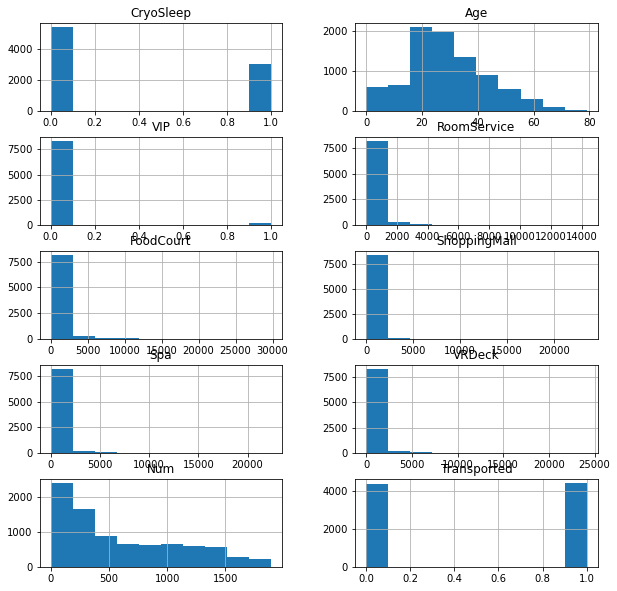

In [15]:
# Histogram
ctrain[quantitative + ['Transported']].hist(figsize=(10,10), layout=(5,2), sharex=False, sharey=False)
plt.show()

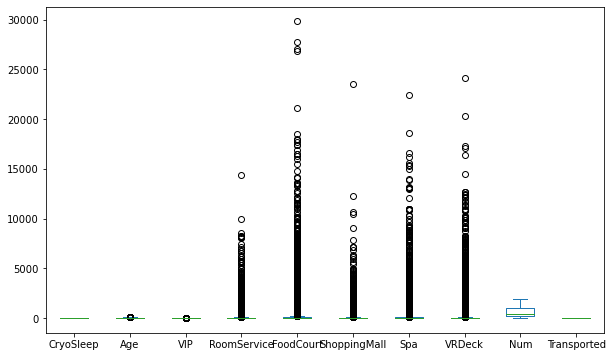

In [16]:
# Box plot
ctrain[quantitative + ['Transported']].plot(kind='box', figsize=(10,6), layout=(5,2), sharex=False, sharey=False)
plt.show()

In [17]:
# Correlation matrix
corr_matrix = ctrain.corr(method='pearson')
print(corr_matrix)

              CryoSleep       Age       VIP  RoomService  FoodCourt  \
CryoSleep      1.000000 -0.074273 -0.081402    -0.252396  -0.211510   
Age           -0.074273  1.000000  0.092819     0.068723   0.130421   
VIP           -0.081402  0.092819  1.000000     0.058785   0.129799   
RoomService   -0.252396  0.068723  0.058785     1.000000  -0.015889   
FoodCourt     -0.211510  0.130421  0.129799    -0.015889   1.000000   
ShoppingMall  -0.212514  0.033133  0.018295     0.054480  -0.014228   
Spa           -0.203991  0.123970  0.061059     0.010080   0.221891   
VRDeck        -0.198857  0.101007  0.125974    -0.019581   0.227995   
Transported    0.468645 -0.075026 -0.037650    -0.244611   0.046566   
Num           -0.037560 -0.132255 -0.099416    -0.008986  -0.183429   

              ShoppingMall       Spa    VRDeck  Transported       Num  
CryoSleep        -0.212514 -0.203991 -0.198857     0.468645 -0.037560  
Age               0.033133  0.123970  0.101007    -0.075026 -0.132255  
VI

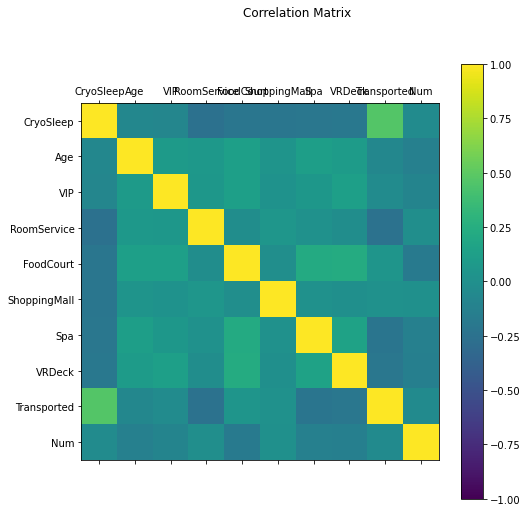

In [18]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("Correlation Matrix")
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
names = ['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported','Num']
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Fill missing data

In [19]:
dfInfo(ctrain[quantitative])

Data description:
Total number of records: 8693
Total number of columns/features/variables: 9


           Name     Type  Unique levels  Missing
0     CryoSleep  float64              2      217
1           Age  float64             80      179
2           VIP  float64              2      203
3   RoomService  float64           1273      181
4     FoodCourt  float64           1507      183
5  ShoppingMall  float64           1115      208
6           Spa  float64           1327      183
7        VRDeck  float64           1306      188
8           Num  float64           1817      199


In [20]:
ctrain[quantitative].describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num
count,8476.000000,8514.000000,8490.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8494.000000
mean,0.358306,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,600.367671
std,0.479531,14.489021,0.151303,666.717663,1611.489240,604.696458,1136.705535,1145.717189,511.867226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000
75%,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,999.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


In [21]:
ctrain['RoomService'] = ctrain['RoomService'].fillna(ctrain['RoomService'].median())
ctrain['FoodCourt'] = ctrain['FoodCourt'].fillna(ctrain['FoodCourt'].median())
ctrain['ShoppingMall'] = ctrain['ShoppingMall'].fillna(ctrain['ShoppingMall'].median())
ctrain['Spa'] = ctrain['Spa'].fillna(ctrain['Spa'].median())
ctrain['VRDeck'] = ctrain['VRDeck'].fillna(ctrain['VRDeck'].median())
ctrain['Num'] = ctrain['Num'].fillna(ctrain['Num'].median())

In [22]:
dfInfo(ctrain[quantitative])

Data description:
Total number of records: 8693
Total number of columns/features/variables: 9


           Name     Type  Unique levels  Missing
0     CryoSleep  float64              2      217
1           Age  float64             80      179
2           VIP  float64              2      203
3   RoomService  float64           1273        0
4     FoodCourt  float64           1507        0
5  ShoppingMall  float64           1115        0
6           Spa  float64           1327        0
7        VRDeck  float64           1306        0
8           Num  float64           1817        0


In [23]:
ctrain['Age'] = ctrain['Age'].fillna(ctrain['Age'].mean())

In [24]:
print("Passengers in CryoSleep: %d (%f%%)" % (ctrain['CryoSleep'].sum(), (ctrain['CryoSleep'].sum()/ctrain.shape[0])*100) )
print("VIP passengers: %d (%f%%)" % (ctrain['VIP'].sum(), (ctrain['VIP'].sum()/ctrain.shape[0])*100) ) 

Passengers in CryoSleep: 3037 (34.936156%)
VIP passengers: 199 (2.289198%)


In [25]:
train_final = ctrain[quantitative + ['Transported']]
dfInfo(train_final)

Data description:
Total number of records: 8693
Total number of columns/features/variables: 10


           Name     Type  Unique levels  Missing
0     CryoSleep  float64              2      217
1           Age  float64             81        0
2           VIP  float64              2      203
3   RoomService  float64           1273        0
4     FoodCourt  float64           1507        0
5  ShoppingMall  float64           1115        0
6           Spa  float64           1327        0
7        VRDeck  float64           1306        0
8           Num  float64           1817        0
9   Transported    int64              2        0


In [26]:
train_final = train_final.dropna()
dfInfo(train_final)

Data description:
Total number of records: 8280
Total number of columns/features/variables: 10


           Name     Type  Unique levels  Missing
0     CryoSleep  float64              2        0
1           Age  float64             81        0
2           VIP  float64              2        0
3   RoomService  float64           1235        0
4     FoodCourt  float64           1458        0
5  ShoppingMall  float64           1095        0
6           Spa  float64           1288        0
7        VRDeck  float64           1269        0
8           Num  float64           1804        0
9   Transported    int64              2        0


## Evaluate algorithms

In [27]:
X = train_final.drop(['Transported'], axis=1).values
Y = train_final['Transported'].values

### Test Harness

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Build Models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Spot-check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [32]:
results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.782005 (0.009312)
CART: 0.698913 (0.011547)
KNN: 0.758454 (0.014653)
LDA: 0.761353 (0.014635)
GNB: 0.690217 (0.023458)
SVC: 0.786473 (0.013968)


### Select the best model

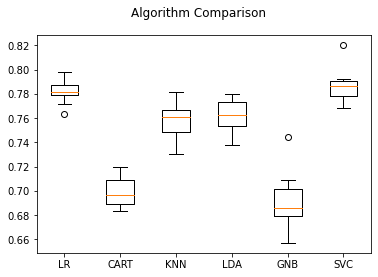

In [33]:
# Compare algoritms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Evaluate Test Data

In [34]:
dfInfo(test)

Data description:
Total number of records: 4277
Total number of columns/features/variables: 13


            Name     Type  Unique levels  Missing
0    PassengerId   object           4277        0
1     HomePlanet   object              3       87
2      CryoSleep   object              2       93
3          Cabin   object           3265      100
4    Destination   object              3       92
5            Age  float64             79       91
6            VIP   object              2       93
7    RoomService  float64            842       82
8      FoodCourt  float64            902      106
9   ShoppingMall  float64            715       98
10           Spa  float64            833      101
11        VRDeck  float64            796       80
12          Name   object           4176       94


In [35]:
ctest = test.copy()

Let's do the same transformation used to transform the train dataset

In [36]:
ctest['CryoSleep'] = ctest['CryoSleep'].map({True:1, False:0})
ctest['VIP'] = ctest['VIP'].map({True:1, False:0})

Let's divide the feature **Cabin** into thre features: **Deck**, **Num**, **Side**

In [37]:
cabin = ctest['Cabin'].str.split("/",expand=True)
ctest = pd.concat([ctest,cabin], axis=1)
ctest.rename(columns={0:'Deck', 1:'Num', 2:'Port'}, inplace=True)

In [38]:
ctest['Num'] = pd.to_numeric(ctest['Num'], errors='coerce')

In [43]:
dfInfo(ctest[quantitative])

Data description:
Total number of records: 4277
Total number of columns/features/variables: 9


           Name     Type  Unique levels  Missing
0     CryoSleep  float64              2       93
1           Age  float64             79       91
2           VIP  float64              2       93
3   RoomService  float64            842       82
4     FoodCourt  float64            902      106
5  ShoppingMall  float64            715       98
6           Spa  float64            833      101
7        VRDeck  float64            796       80
8           Num  float64           1505      100


### Fill missing data in test dataset

In [44]:
ctest['RoomService'] = ctest['RoomService'].fillna(ctest['RoomService'].median())
ctest['FoodCourt'] = ctest['FoodCourt'].fillna(ctest['FoodCourt'].median())
ctest['ShoppingMall'] = ctest['ShoppingMall'].fillna(ctest['ShoppingMall'].median())
ctest['Spa'] = ctest['Spa'].fillna(ctest['Spa'].median())
ctest['VRDeck'] = ctest['VRDeck'].fillna(ctest['VRDeck'].median())
ctest['Num'] = ctest['Num'].fillna(ctest['Num'].median())

In [45]:
ctest['Age'] = ctest['Age'].fillna(ctrain['Age'].mean())

In [46]:
dfInfo(ctest[quantitative])

Data description:
Total number of records: 4277
Total number of columns/features/variables: 9


           Name     Type  Unique levels  Missing
0     CryoSleep  float64              2       93
1           Age  float64             80        0
2           VIP  float64              2       93
3   RoomService  float64            842        0
4     FoodCourt  float64            902        0
5  ShoppingMall  float64            715        0
6           Spa  float64            833        0
7        VRDeck  float64            796        0
8           Num  float64           1505        0


In [47]:
print("Passengers in CryoSleep: %d (%f%%)" % (ctest['CryoSleep'].sum(), (ctest['CryoSleep'].sum()/ctest.shape[0])*100) )
print("VIP passengers: %d (%f%%)" % (ctest['VIP'].sum(), (ctest['VIP'].sum()/ctest.shape[0])*100) ) 

Passengers in CryoSleep: 1544 (36.100070%)
VIP passengers: 74 (1.730185%)


In [48]:
ctest['CryoSleep'] = ctest['CryoSleep'].fillna(method='ffill')
ctest['VIP'] = ctest['VIP'].fillna(method='ffill')

In [49]:
dfInfo(ctest[quantitative])

Data description:
Total number of records: 4277
Total number of columns/features/variables: 9


           Name     Type  Unique levels  Missing
0     CryoSleep  float64              2        0
1           Age  float64             80        0
2           VIP  float64              2        0
3   RoomService  float64            842        0
4     FoodCourt  float64            902        0
5  ShoppingMall  float64            715        0
6           Spa  float64            833        0
7        VRDeck  float64            796        0
8           Num  float64           1505        0


### Evaluate test data

In [50]:
X_test = ctest[quantitative].values

In [51]:
# Definimos nuestro modelo
svc = SVC()
svc.fit(X,Y)
predictions = svc.predict(X_test)

### Save my predictions

In [58]:
my_predict = pd.DataFrame()
my_predict['PassengerId'] = ctest['PassengerId']
my_predict['Transported'] = predictions

In [59]:
my_predict['Transported'] = my_predict['Transported'].map({0:False, 1:True})

In [60]:
# Salvamos mis predicciones
my_predict.to_csv('my_predictions_Titanic_Spaceship.csv', index=False)